In [1]:

!pip install tensorflow
!pip install tensorflow_hub
!pip install tensorflow_text
!pip install keras
!pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


Output:
tweet         object
text_label    object
dtype: object
how many sets of 2?  (1065, 2)
388    if theres one good thing about what og are doi...
972                         fucking cunt meet me in asda
273    it is widely acknowledged that erdogan is a go...
872    i think all cishet men should have to take a c...
763    could you do your videos with less feminism an...
                             ...                        
681                 what world does this dumbass live in
450     one thing about me  if im ever aiming somethi...
878    josephliberal realdonaldtrump i guess you forg...
893    men who decided to be violent rhetorical bomb ...
193    realdonaldtrump in the past trump just fired a...
Name: tweet, Length: 1065, dtype: object
fucking cunt meet me in asda i think all cishet men should have to take a class called how to shut the fuck up and just suck a pussy before they could you do your videos with less feminism and postmodernism prejudice breeds malcontents  

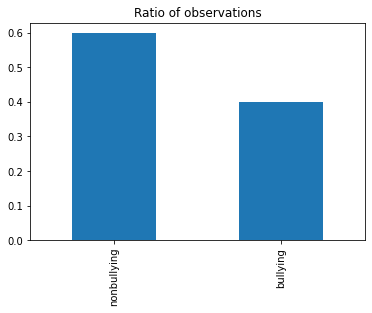

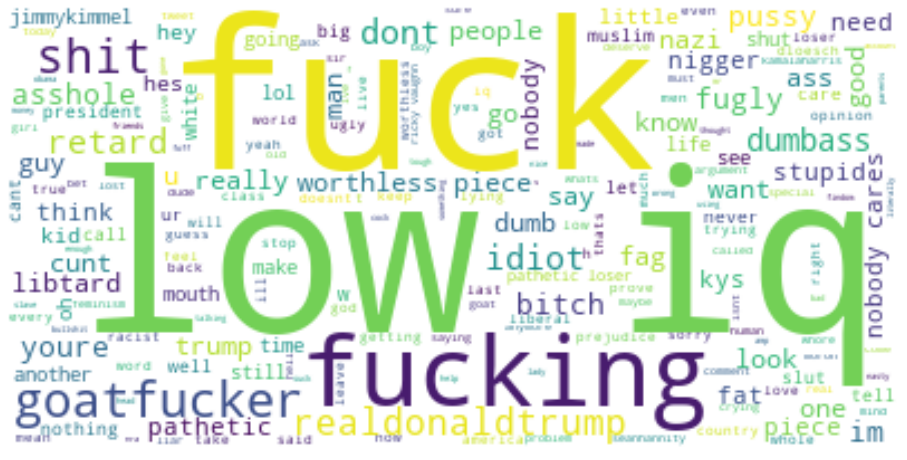

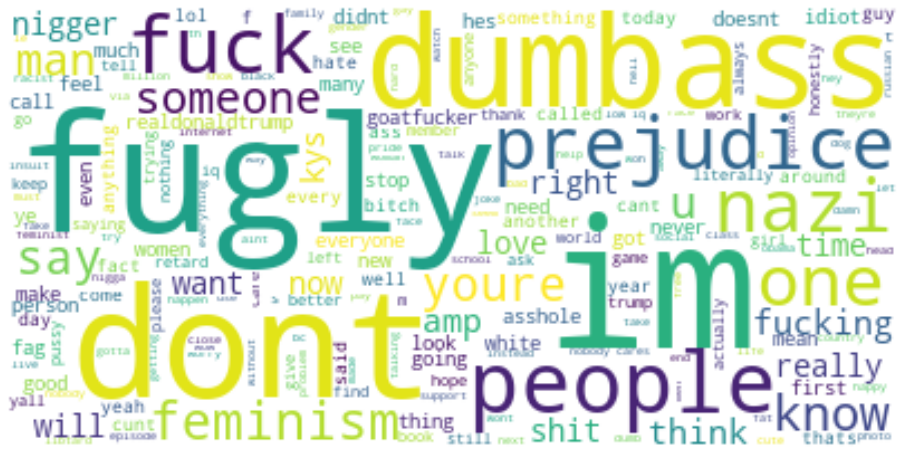

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
100%|██████████| 86/86 [00:03<00:00, 23.63it/s]


(768, 512) (86, 512)
(768, 512) (768, 2)
Epoch 1/10
44/44 [==============================] - 1s 8ms/step - loss: 0.6513 - accuracy: 0.6787 - val_loss: 0.5813 - val_accuracy: 0.7662
Epoch 2/10
44/44 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.7815 - val_loss: 0.4788 - val_accuracy: 0.8052
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8191 - val_loss: 0.4654 - val_accuracy: 0.8182
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.8698 - val_loss: 0.4864 - val_accuracy: 0.8312
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8915 - val_loss: 0.5019 - val_accuracy: 0.8052
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.2124 - accuracy: 0.9247 - val_loss: 0.5427 - val_accuracy: 0.7922
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9392 - val_loss: 0.5709 - 

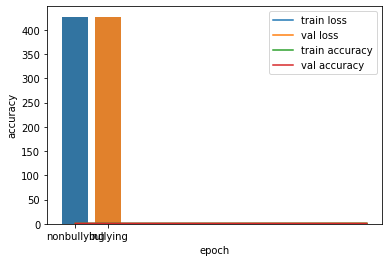

In [6]:

import pickle
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm 
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from tensorflow.keras import callbacks, optimizers

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import word_tokenize
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import preprocessing
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split


RANDOM_SEED = 42

# Load dataset
df = pd.read_csv("tweetfile.csv")

result = df.dtypes

print("Output:")
print(result)

# Shuffle data to get randomized sequence of observations.
df = df.sample(frac=1, random_state=1500)

# Print first 5 rows of the data.
df.head()

print('how many sets of 2? ', df.shape)

df['text_label'].value_counts(normalize=True).plot(kind='bar', title='Ratio of observations')

#change to lower case
 # Remove stop words.

print(df.tweet)
#english_stops = set(stopwords.words('english'))
# Remove un-necessary words.
#characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
#clean_words = [word for word in words if word not in english_stops and word not in characters_to_remove]


bullying = df[df['text_label'] == 'bullying']
nonbullying = df[df['text_label'] == 'nonbullying']

bullyingT = " ".join(bullying.tweet.to_numpy().tolist())
nonbullyingT = " ".join(nonbullying.tweet.to_numpy().tolist())

print(bullyingT)

print(nonbullyingT)

bullyingCloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(bullyingT)
nonbullyingCloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(nonbullyingT)

def show_word_cloud(cloud): 
    plt.figure(figsize=(16,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

show_word_cloud(bullyingCloud)

show_word_cloud(nonbullyingCloud)

nonbullying_df = nonbullying.sample(n=len(bullying), random_state=RANDOM_SEED)

bullying_df = bullying

review_df = nonbullying_df.append(bullying_df).reset_index(drop=True)

review_df.head()

sns.countplot(review_df.text_label)

#tokenize and encode, universal sentence encoder

use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

sent_1 = ['fuck you']
sent_2 = ['go kill yourself']

emb_1 = use(sent_1)
emb_2 = use(sent_2)

emb_1

emb_1.shape

np.inner(emb_1, emb_2).flatten()[0]

emb_1

emb_1

from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.text_label.to_numpy().reshape(-1, 1)
)

train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.tweet, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )

X_train = []
for r in tqdm(train_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

print(X_train.shape, X_test.shape)

print(X_train.shape, y_train.shape)

model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

path_checkpoint = "/cp.ckpt"

callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                                 save_weights_only=True,
                                                 verbose=1)

elst = callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
#save_ck = callbacks.ModeCheckpoint('.mdl_wt.hdf5',save_best_only=True,monitor='val_loss',mode= 'min')

history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1,
    shuffle=True
)


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

model.evaluate(X_test, y_test)

pickle.dump(model, open('FinalModel.sav','wb'))

load = pickle.load(open("FinalModel.sav", 'rb'))


In [7]:
print(test_reviews.iloc[0])
print("Bad" if y_test[0][0] == 1 else "Good")

some families have a skeleton in the closet  we had a nazi flag in the attic
Good


In [8]:
print(test_reviews.iloc[1])
print("Bad" if y_test[1][0] == 1 else "Good")

another insecure fag  what a suprsie
Bad


In [9]:
print(test_reviews.iloc[2])
print("Bad" if y_test[2][0] == 1 else "Good")

happy mingyus day happymingyuday seventeen mingyu]
Good


In [10]:
print(test_reviews.iloc[3])
print("Bad" if y_test[3][0] == 1 else "Good")

i thought they still idd as aroace so i was worried  bc if someone uses the]
Good


In [11]:
print(test_reviews.iloc[10])
print("Bad" if y_test[10][0] == 1 else "Good")

dumbass pathetic pig needs to rot
Bad


+

In [ ]:

! pip install streamlit -q
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py
import streamlit as st
st.write('# Hello World from 1littlecoder, please subscribe')
st.write('## Run Streamlit on Colab with `pyngrok` ')
st.write("This is an amazing tutorial, I love this channel!!!")
st.markdown("# Don't forget to subscribe")

Overwriting app.py


In [ ]:
!ngrok authtoken *enter your own


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!pgrep streamlit

4051


In [ ]:
publ_url = ngrok.connect(port='80')

PyngrokNgrokHTTPError: ignored

In [ ]:
publ_url

<NgrokTunnel: "http://24f1-35-245-53-127.ngrok.io" -> "http://localhost:80">